In [41]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [37]:
z_mean = np.load("./z_mean.npy")
z_var = np.load("./z_log_var.npy")
labels = np.load("./labels.npy")

In [39]:
mean_col = ["mean{}".format(k) for k in range(128)]
std_col = ["std{}".format(k) for k in range(128)]
index = [k for k in range(1500)]
data = np.concatenate((z_mean,z_var),axis=1)
df = pd.DataFrame(data=data, index=index, columns=mean_col+std_col)
df = StandardScaler().fit_transform(df)
df.shape

(1500, 256)

In [36]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,9.606380,-8.374682
1,4.948176,1.785869
2,7.291458,4.357103
3,-0.952061,2.134638
4,-18.581777,4.556736


In [40]:
principalDf['label'] = labels
principalDf.head()

,principal component 1,principal component 2,label
0,9.606380,-8.374682,0
1,4.948176,1.785869,0
2,7.291458,4.357103,1
3,-0.952061,2.134638,0
4,-18.581777,4.556736,0


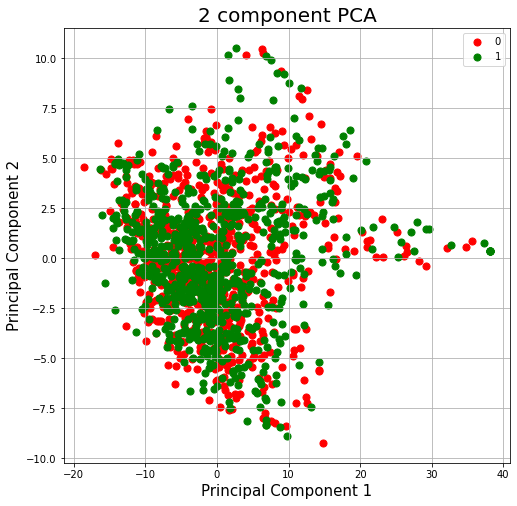

In [47]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['label'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(['Original'])
ax.grid()